# Challenge Problem Data Analysis 
### I wanted to present a detailed accounting of the steps I took to analyze the concert venue data provided and the different thoughts I had regarding the data along the way. I've kept it very explicit and left in sections I didn't use so that you could see ideas I had about how to tackle this problem. I will also attempt to comment my code.

In [1]:
# import a variety of Python modules. Mainly for plotting. Matplotlib is the standard plotting package and bokeh
# provides the interactive plots. Very similar to those provided by Mode.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.charts import Scatter, Bar, output_file, Area
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral11
from bokeh.models import Span, Axis
from bokeh.models.ranges import Range1d
from bokeh.models.axes import LinearAxis
from collections import OrderedDict

In [2]:
# import raw data
raw_data = pd.read_csv('./AnalystData202.csv')

In [3]:
# I commonly print out the head of a large dataframe to see what I'm working with. I was unsure of the date/time
# format of the provided data, but I inferred that there was an increase in the value by '1' for each day
# based on the instructions provided. I didn't bother converting it to a real date, as it is unnecessary for the
# current analysis
raw_data.head()

,ConcertDate,SaleDate,QtySold
0,39025,39003,1689
1,39025,39004,384
2,39025,39005,214
3,39025,39006,105
4,39025,39007,52


In [4]:
# added a column for the number of days from the concert date
raw_data['Diffs'] = raw_data.SaleDate - raw_data.ConcertDate

In [5]:
# determined the quantity sold for each concert
total_sales = raw_data.groupby([raw_data.ConcertDate])['QtySold'].sum()

In [6]:
# explore the sort of sales numbers I'm working with
total_sales.head()

ConcertDate
38667    11508
38668    11349
38674    11342
38675    11469
38681    11690
Name: QtySold, dtype: int64

In [7]:
# looking at particular date in which the venue was sold out
total_sales[total_sales.index == 39025]

ConcertDate
39025    12000
Name: QtySold, dtype: int64

In [8]:
# tell Bokeh to render the plot inline
output_notebook()

Loading BokehJS ...

In [9]:
# plot the concert sales data in an interactive fashion so that I could zoom in around particular dates to explore
# I was also looking for any visble trend in the data over the course of the year
# Finally, I wanted to showcase that Bokeh could do the grouping and aggregation within the plot command
q = Bar(raw_data, 'ConcertDate', values='QtySold', agg='sum', legend=False)

In [10]:
show(q)

In [11]:
# looking for basic insight into the kinds of sales numbers
total_sales.value_counts()

12000    31
11671     2
11349     2
11690     1
11689     1
11300     1
11558     1
11815     1
11433     1
11376     1
11296     1
11692     1
11694     1
11760     1
11570     1
11443     1
11829     1
11319     1
11819     1
11632     1
11913     1
11150     1
11778     1
11566     1
11524     1
11470     1
11402     1
11787     1
11746     1
11618     1
         ..
11752     1
11679     1
11921     1
11699     1
11505     1
11837     1
11891     1
11508     1
11936     1
11766     1
11640     1
11898     1
10978     1
11358     1
11229     1
11779     1
11605     1
11992     1
11987     1
11858     1
11855     1
11342     1
11469     1
11464     1
11846     1
11587     1
11969     1
11840     1
11966     1
11905     1
Name: QtySold, dtype: int64

In [12]:
# shortfall of ~1200 tickets is the most in the entire set
total_sales.min()

10805

In [13]:
# wanted to do a quick back of the envelope calculation. Given this average and based on eyeballing the max sales in a
# single day, it's appears that a cost of $1000 per week is easily worthwhile as it only require additional sales of
# 100+ tickets
total_sales.mean()

11730.692307692309

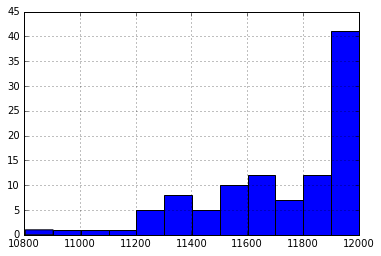

In [14]:
# quick visualization to see the distribution, bin width of 100 
total_sales.hist(bins=12)

In [15]:
# checking that the number of concerts is correct. 104 means 2 concerts/week for 52 weeks
len(total_sales)

104

In [16]:
# compare the above against the number of unique concert dates for confirmation
raw_data.ConcertDate.nunique()

104

In [17]:
# group in pairs to get total sales per week (per act)
total_act = total_sales.groupby(np.arange(len(total_sales))//2).sum()

In [18]:
total_act.head()

0    22857
1    22811
2    23519
3    22482
4    22992
Name: QtySold, dtype: int64

In [19]:
# min sales per week. shortfall of ~1700 ticket sales. might not be able to guarantee complete sell out of tickets
# every week based on sales for two best days
total_act.min()

22322

In [20]:
# mean number of sales shows shortfall of ~550 tickets, thus on average, I might be able to sell out all tickets by 
# running a single ad
total_act.mean()

23461.384615384617

In [21]:
# explore sales on a particular date, for possible use in improved recommendation
sales_by_day = raw_data.groupby(raw_data.SaleDate)['QtySold'].sum()

In [22]:
# interesting results. Originally assumed that the two best sales days were Thursday and Friday (assuming Friday and
# Saturday concerts). However, if you include all of the sales for all concerts and not just a single act, Friday and
# Saturday are the best days. This is because new tickets go on sale on the Saturday and get a big bump from the 7
# concerts on sale on a given Saturday
sales_by_day[0:100]

SaleDate
38646    2322
38647     577
38648     283
38649     142
38650      71
38651      72
38652      76
38653    2418
38654     734
38655     357
38656     214
38657     152
38658     144
38659     150
38660    2703
38661     925
38662    1017
38663    1538
38664    1886
38665    2100
38666    3653
38667    8267
38668    4428
38669    1089
38670    1537
38671    1667
38672    2002
38673    3286
38674    8402
38675    4851
         ... 
38716    8155
38717    4307
38718    1132
38719    1530
38720    1797
38721    2197
38722    3579
38723    8811
38724    4916
38725    1066
38726    1534
38727    1763
38728    2052
38729    3770
38730    8194
38731    4424
38732    1097
38733    1736
38734    1744
38735    2173
38736    3321
38737    8546
38738    4962
38739    1163
38740    1515
38741    1800
38742    2262
38743    3551
38744    8641
38745    4517
Name: QtySold, dtype: int64

In [23]:
# Looking at the different concerts on sale on a particular Saturday
raw_data[raw_data['SaleDate'] == 38668]

,ConcertDate,SaleDate,QtySold,Diffs
2161,38689,38668,299,-21
2184,38688,38668,323,-20
2213,38682,38668,40,-14
2236,38681,38668,37,-13
2265,38675,38668,67,-7
2288,38674,38668,207,-6
2317,38668,38668,3455,0


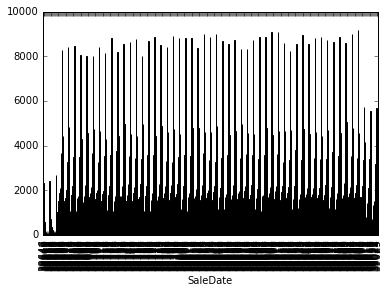

In [24]:
# Again, looking for an obvious pattern to the sales. Would use a Fourier transform to explore underlying periodicity
sales_by_day.plot(kind='bar')

In [25]:
# Yearly ticket sales
raw_data.QtySold.sum()

1219992

In [26]:
# Looking to see the absolute maximum increase in revenue which could be obtained by selling every single ticket
# Including the cost of the ad campaign. See that a $1 increase is a much larger source of income
(12000*2*52 - raw_data.QtySold.sum())*10-500*2*52

228080

In [27]:
# Looking at how sales trends look for each concert by first grouping on concert date
by_concert = raw_data.groupby(['ConcertDate'])

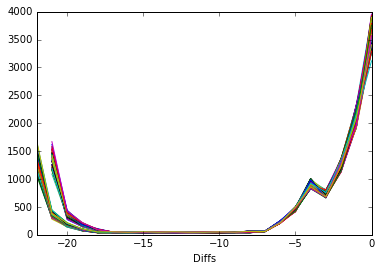

In [28]:
fig, ax = plt.subplots(1, 1)
offset = 0
for i, group in by_concert:
    group.plot(x='Diffs', y='QtySold', ax=ax, legend=False) #label=str(i)
    offset+=0.01

In [29]:
# same plot as above but interactive. very concerned about the data. far too regular for my liking
p = figure()
color_palette=Spectral11[0:raw_data.ConcertDate.nunique()]
hline = Span(location=1200, dimension='width', line_color='green', line_width=3)
for i, group in by_concert:
    p.line(x=group.Diffs, y=group.QtySold, color=color_palette[np.random.randint(11)])
p.add_layout(hline)

In [30]:
show(p)

In [31]:
# Checking the stats on sales number for each concert, due to concern over very regular pattern
raw_data.groupby(['ConcertDate'])['QtySold'].describe()

ConcertDate       
38667        count      22.000000
             mean      523.090909
             std       892.171397
             min        33.000000
             25%        35.250000
             50%        69.000000
             75%       656.500000
             max      3575.000000
38668        count      23.000000
             mean      493.434783
             std       846.985930
             min        34.000000
             25%        38.000000
             50%        62.000000
             75%       576.500000
             max      3455.000000
38674        count      22.000000
             mean      515.545455
             std       904.588448
             min        35.000000
             25%        37.500000
             50%        67.000000
             75%       628.500000
             max      3850.000000
38675        count      23.000000
             mean      498.652174
             std       891.930267
             min        34.000000
             25%        38.50

In [32]:
# Looking at total sales for number of days before concert
sales_by_days_to_concert = raw_data.groupby('Diffs')['QtySold'].sum()

In [33]:
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,hover'
s = figure(tools=TOOLS)
s.line(x=sales_by_days_to_concert.index, y=sales_by_days_to_concert)
s.yaxis[0].formatter.use_scientific = False

In [34]:
show(s)

In [35]:
raw_data.sort_values(by='ConcertDate')[0:45]

,ConcertDate,SaleDate,QtySold,Diffs
2339,38667,38667,3575,0
2318,38667,38646,1259,-21
2319,38667,38647,273,-20
2320,38667,38648,144,-19
2321,38667,38649,72,-18
2322,38667,38650,33,-17
2323,38667,38651,35,-16
2324,38667,38652,36,-15
2325,38667,38653,39,-14
2326,38667,38654,39,-13


In [36]:
3575 + 2219

5794

In [118]:
sales_per_act_by_day = raw_data.sort_values(by='ConcertDate').groupby([np.arange(len(raw_data))//45,'SaleDate'])\
['QtySold'].sum()

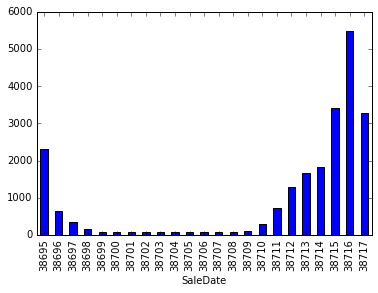

In [119]:
sales_per_act_by_day[7].plot(kind='bar')

In [151]:
sales_per_act_by_day

    SaleDate
0   38646       2322
    38647        577
    38648        283
    38649        142
    38650         71
    38651         72
    38652         76
    38653         73
    38654         77
    38655         73
    38656         71
    38657         71
    38658         72
    38659         69
    38660        123
    38661        285
    38662        655
    38663       1302
    38664       1735
    38665       1955
    38666       3504
    38667       5794
    38668       3455
1   38653       2345
    38654        657
    38655        284
    38656        143
    38657         81
    38658         72
    38659         81
                ... 
50  39012        694
    39013       1352
    39014       1599
    39015       1986
    39016       3305
    39017       5417
    39018       3116
51  39003       3358
    39004        813
    39005        433
    39006        196
    39007        105
    39008        101
    39009         91
    39010        108
    39011         96


In [121]:
sales_per_act = pd.DataFrame(sales_per_act_by_day.sum(level=0))

In [122]:
sales_per_act_by_day_copy = pd.DataFrame(sales_per_act_by_day)

In [209]:
def add_day_number(group):
    group['day'] = np.arange(23)
    return group

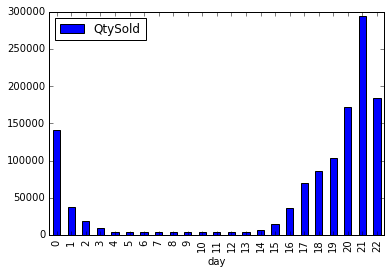

In [213]:
sales_per_act_by_day_copy.groupby(level=0).apply(add_day_number).groupby('day').sum().plot(kind='bar')

In [214]:
def increase_sales_thurfri(group):
    group.iloc[-2] = round(group.iloc[-2]*1.10)
    group.iloc[-3] = round(group.iloc[-3]*1.10)
    return group

In [215]:
def increase_sales_frisat(group):
    group.iloc[-2] = round(group.iloc[-2]*1.10)
    group.iloc[-1] = round(group.iloc[-1]*1.10)
    return group

In [216]:
def increase_sales_fri_only(group):
    group.iloc[-2] = round(group.iloc[-2]*1.10)
    return group

In [217]:
def increase_sales_thur_only(group):
    group.iloc[-3] = round(group.iloc[-3]*1.10)
    return group

In [218]:
def set_max(value):
    if value > 24000.0:
        return 24000.0
    else:
        return value

In [219]:
sales_per_act_by_day_copy.groupby(level=0).apply(increase_sales_thurfri).sum(level=[0]).applymap(set_max)

,QtySold
0,23786.0
1,23714.0
2,24000.0
3,23376.0
4,23914.0
5,23884.0
6,23310.0
7,23210.0
8,24000.0
9,23636.0


In [220]:
# total revenue no ads
revenue_no_ads = raw_data.QtySold.sum()*10

In [221]:
revenue_thurfri = sales_per_act_by_day_copy.groupby(level=0).apply(increase_sales_thurfri).sum(level=[0])\
.applymap(set_max).sum()*10

In [222]:
revenue_thurfri - revenue_no_ads - 2*500*52

QtySold    188470.0
dtype: float64

In [223]:
revenue_frisat = sales_per_act_by_day_copy.groupby(level=0).apply(increase_sales_frisat).sum(level=[0])\
.applymap(set_max).sum()*10

In [224]:
revenue_frisat - revenue_no_ads - 2*500*52

QtySold    190710.0
dtype: float64

In [225]:
revenue_fri_only = sales_per_act_by_day_copy.groupby(level=0).apply(increase_sales_fri_only).sum(level=[0])\
.applymap(set_max).sum()*10

In [226]:
revenue_fri_only - revenue_no_ads - 1*500*52

QtySold    162080.0
dtype: float64

In [227]:
revenue_thur_only = sales_per_act_by_day_copy.groupby(level=0).apply(increase_sales_thur_only).sum(level=[0])\
.applymap(set_max).sum()*10

In [243]:
revenue_thur_only - revenue_no_ads - 1*500*52

QtySold    103360.0
dtype: float64

In [244]:
sales_frisat = sales_per_act_by_day_copy.groupby(level=0).apply(increase_sales_frisat).sum(level=[0]).applymap(set_max)

In [245]:
sales_diff_ad = sales_frisat - sales_per_act

In [246]:
# The following lines are used to create the kind of DataFrame required by bokeh to create a stacked bar graph
# The input format was changed in a recent version and seems less straight forward
sales_no_ads = sales_per_act.QtySold.astype(float).values.tolist()

In [247]:
sales_with_ads = sales_diff_ad.QtySold.values.tolist()

In [248]:
sales_per_act_plot = sales_per_act.copy()
sales_per_act_plot['order']='no ads'

In [249]:
sales_diff_plot = sales_diff_ad.copy()
sales_diff_plot['order']='with ads'

In [250]:
sales_df = pd.concat([sales_per_act_plot.reset_index(), sales_diff_plot.reset_index()])

In [251]:
sales_df

,index,QtySold,order
0,0,22857.0,no ads
1,1,22811.0,no ads
2,2,23519.0,no ads
3,3,22482.0,no ads
4,4,22992.0,no ads
5,5,22991.0,no ads
6,6,22445.0,no ads
7,7,22322.0,no ads
8,8,23738.0,no ads
9,9,22740.0,no ads


In [252]:
sales_df.rename(columns =({'index':'week'}), inplace=True)

In [253]:
sales_plot = Bar(sales_df, values='QtySold', stack='order', label='week', xlabel='Act (Week)', ylabel='Ticket Sales',\
                legend='bottom_right', width=900, height=900)
sales_plot.y_range = Range1d(20000, 24050)
sales_plot.extra_y_ranges = {"Sales ($)":Range1d(200, 240.50)}
sales_plot.add_layout(LinearAxis(y_range_name="Sales ($)", axis_label="Sales (1000s of $)"), 'right')

In [254]:
show(sales_plot)

In [255]:
# create DataFrame to export to excel for prettier plotting
excel_df = sales_per_act.join(sales_diff_ad, how='left', rsuffix='_diff')

In [256]:
excel_df.head()

,QtySold,QtySold_diff
0,22857,925.0
1,22811,973.0
2,23519,481.0
3,22482,891.0
4,22992,912.0


In [257]:
writer = pd.ExcelWriter('new_result.xlsx')
excel_df.to_excel(writer, 'Sheet1')
writer.save()